# Загрузка данных

In [230]:
from IPython.display import Image
#import graphviz 
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from sklearn.datasets import load_iris, load_wine, load_boston
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
%matplotlib inline 
from IPython.display import Image
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris, load_boston
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, StratifiedKFold
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import learning_curve, validation_curve
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [185]:
wine = load_wine()

In [196]:
df_wine = pd.DataFrame(wine.data,columns=wine.feature_names)
df_wine['target'] = pd.Series(wine.target)
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


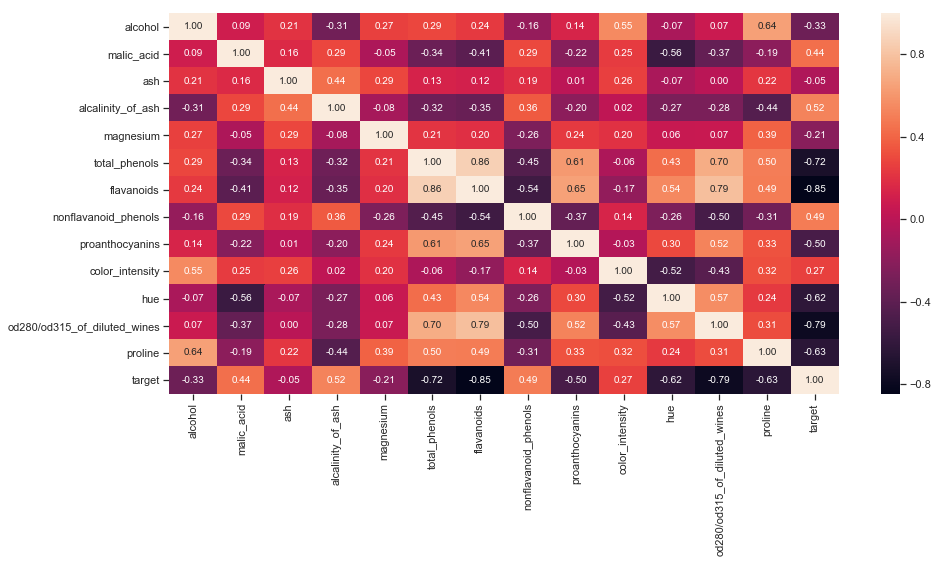

In [198]:
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(df_wine.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

# Деревья решений

In [187]:
wine_tree_cl = DecisionTreeClassifier(random_state=1)
wine_tree_cl.fit(wine_x_ds, wine.target)
wine_tree_cl

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [188]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [189]:
list(zip(wine_x_ds.columns.values, wine_tree_cl.feature_importances_))

[('alcohol', 0.012570564071187309),
 ('malic_acid', 0.014223159778821876),
 ('ash', 0.0),
 ('alcalinity_of_ash', 0.0),
 ('magnesium', 0.0534597951279922),
 ('total_phenols', 0.0),
 ('flavanoids', 0.16704836491408806),
 ('nonflavanoid_phenols', 0.0),
 ('proanthocyanins', 0.0),
 ('color_intensity', 0.0),
 ('hue', 0.058185091460406506),
 ('od280/od315_of_diluted_wines', 0.3120425747831769),
 ('proline', 0.38247044986432716)]

In [190]:
sum(wine_tree_cl.feature_importances_)

1.0

In [191]:
wine_X_train, wine_X_test, wine_y_train, wine_y_test = train_test_split(
    wine_x_ds, wine.target, test_size=0.5, random_state=1)
wine_X_train.shape, wine_X_test.shape

((89, 13), (89, 13))

In [192]:
wine_tree_cl_feat_1 = DecisionTreeClassifier(random_state=1).fit(wine_X_train, wine_y_train)
wine_y_test_predict = wine_tree_cl_feat_1.predict(wine_X_test)
wine_y_test_predict.shape

(89,)

In [193]:
print_accuracy_score_for_classes(wine_y_test, wine_y_test_predict)

Метка 	 Accuracy
0 	 0.8181818181818182
1 	 0.8823529411764706
2 	 0.9545454545454546


In [194]:
mean_absolute_error(wine_y_test, wine_y_test_predict)

0.12359550561797752

In [195]:
median_absolute_error(wine_y_test, wine_y_test_predict)

0.0

# Линейная зависимость

In [212]:
wine_X_train, wine_X_test, wine_y_train, wine_y_test = train_test_split(
    wine.data, wine.target, test_size=0.5, random_state=1)
wine_X_train.shape, wine_X_test.shape

((89, 13), (89, 13))

In [214]:
reg1 = LinearRegression().fit(wine_X_train, wine_y_train)
(b1, reg1.coef_), (b0, reg1.intercept_)

((0.20884722950068055,
  array([-0.14363533,  0.01736955, -0.12304724,  0.04618784, -0.00180479,
          0.21048533, -0.37095489, -0.47875276, -0.10163014,  0.09471474,
         -0.37481097, -0.19107785, -0.00077269])),
 (-1.0715116629341392, 3.881691199237158))

In [215]:
wine_y_test_predict = reg1.predict(wine_X_test)

In [218]:
mean_absolute_error(wine_y_test, wine_y_test_predict)

0.23201284251888057

In [219]:
median_absolute_error(wine_y_test, wine_y_test_predict)

0.2123153564338245

# Метод опорных векторов

In [220]:
# Используем датасет iris с двумя первыми признакам
wine_X = wine.data[:, :2]
wine_y = wine.target

In [227]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    #Можно проверить все ли метки классов предсказываются
    print(np.unique(Z))
    out = ax.contourf(xx, yy, Z, **params)
    return out


def plot_cl(clf):
    title = clf.__repr__
    clf.fit(wine_X, wine_y)
    fig, ax = plt.subplots(figsize=(5,5))
    X0, X1 = wine_X[:, 0], wine_X[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=wine_y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    plt.show()

[0 1 2]


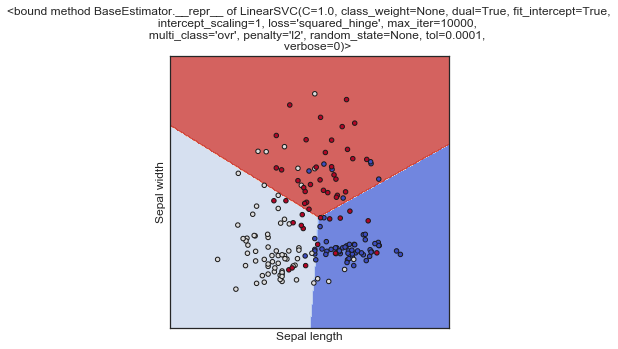

In [228]:
plot_cl(LinearSVC(C=1.0, max_iter=10000))

# Подбор гиперпараметров

In [236]:
scores = cross_val_score(LinearRegression(), 
                         wine.data, wine.target, cv=3)
scores

array([-73.46648267,   0.        ,  -6.64995487])

In [238]:
scores = cross_val_score(LinearSVC(C=1.0, max_iter=10000), 
                         wine.data, wine.target, cv=3)
scores

C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


array([0.93333333, 0.93333333, 0.96551724])

In [239]:
scores = cross_val_score(DecisionTreeClassifier(random_state=1), 
                         wine.data, wine.target, cv=3)
scores

array([0.85      , 0.83333333, 0.9137931 ])

In [246]:
n_range = np.array(range(5,55,5))
tuned_parameters = [{'DecisionTreeClassifier': n_range}]
tuned_parameters

[{'DecisionTreeClassifier': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}]

In [274]:
tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90]}
clf_gs = GridSearchCV(DecisionTreeClassifier(random_state=1), tree_para, cv = 20, scoring='accuracy')
clf_gs.fit(wine_X_train, wine_y_train)

C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=20, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30, 40, 50, 70, 90]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [275]:
clf_gs.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [276]:
clf_gs.best_score_

0.9213483146067416

In [277]:
#Параметры для дерева решений
clf_gs.best_params_

{'criterion': 'entropy', 'max_depth': 4}

In [282]:
model = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(model,parameters, cv=None)
grid.fit(wine_X_train, wine_y_train)

C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=None, error_score='raise-deprecating',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'fit_intercept': [True, False], 'normalize': [True, False], 'copy_X': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [283]:
#Параметры для линейной регрессии
grid.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': False}

In [285]:
param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
grid = GridSearchCV(SVC(),param_grid,refit = True, verbose=2)
grid.fit(wine_X_train, wine_y_train)

C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.1s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.1s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ...........

[CV] ..................... C=100, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=100, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=100, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ................ C=100, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ................ C=100, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV] ................ C=100, gamma=0.001, kernel=linear, total=   0.1s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:    7.3s finished
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 10, 100, 1000], 'gamma': [1, 0.1, 0.001, 0.0001], 'kernel': ['linear', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [286]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'linear'}

# Повторение для найденных оптимальных значений гиперпараметров

[0 1 2]


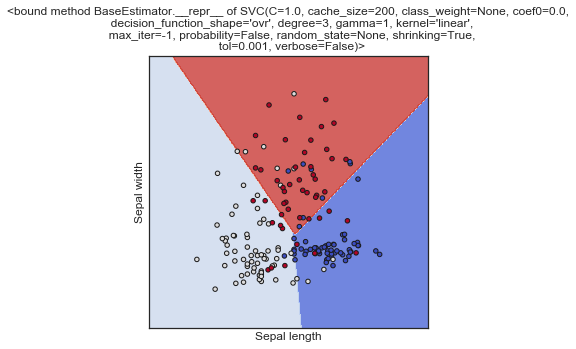

In [288]:
plot_cl(SVC(C=1.0, gamma = 1, kernel = 'linear'))

In [291]:
reg1 = LinearRegression(copy_X = True, fit_intercept = True, normalize = False).fit(wine_X_train, wine_y_train)
(b1, reg1.coef_), (b0, reg1.intercept_)

((0.20884722950068055,
  array([-0.14363533,  0.01736955, -0.12304724,  0.04618784, -0.00180479,
          0.21048533, -0.37095489, -0.47875276, -0.10163014,  0.09471474,
         -0.37481097, -0.19107785, -0.00077269])),
 (-1.0715116629341392, 3.881691199237158))

In [295]:
wine_y_test_predict = reg1.predict(wine_X_test)

In [296]:
mean_absolute_error(wine_y_test, wine_y_test_predict)

0.23201284251888057

In [297]:
median_absolute_error(wine_y_test, wine_y_test_predict)

0.2123153564338245

In [294]:
wine_tree_cl = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)
wine_tree_cl.fit(wine_x_ds, wine.target)
wine_tree_cl

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [298]:
wine_y_test_predict = wine_tree_cl.predict(wine_X_test)

In [299]:
print_accuracy_score_for_classes(wine_y_test, wine_y_test_predict)

Метка 	 Accuracy
0 	 1.0
1 	 1.0
2 	 1.0


In [300]:
mean_absolute_error(wine_y_test, wine_y_test_predict)

0.0

In [301]:
median_absolute_error(wine_y_test, wine_y_test_predict)

0.0